# BellaBeat Project
## Introduction
Bellabeat, a wellness tech company focused on empowering women through health-focused smart devices, is looking to gain insights into consumer fitness habits to enhance its product offerings and marketing strategy. Leveraging data from Fitbit devices, this project explores trends in physical activity, sleep, and other health metrics to identify actionable patterns. The goal is to derive insights that will inform Bellabeat’s marketing approach, helping the company better align with consumer needs and position itself as a leader in the smart wellness device market.

## 1. Importing Libraries
The following libraries were used in this analysis:
- **numpy** and **pandas** for data manipulation.
- **matplotlib** and **seaborn** for data visualization.

In [4]:
#Import Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,6)

pd.options.mode.chained_assignment = None

## 2. Loading Data from Both Folders
    1. Set up paths for v1 and v2 folders.
    2. Read all CSV files from each folder into a dictionary or list for easy access.

In [27]:
# Set the directory paths
v1_path = r'C:\Users\suhan\Downloads\archive\mturkfitbit_export_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16'
v2_path = r'C:\Users\suhan\Downloads\archive\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16'

# Function to load all CSVs in a directory
def load_csv_files(folder_path):
    dataframes = {}
    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            file_path = os.path.join(folder_path, file)
            dataframes[file] = pd.read_csv(file_path)
    return dataframes

# Load data from both folders
v1_data = load_csv_files(v1_path)
v2_data = load_csv_files(v2_path)

## 3. Combining the Corresponding DataFrames from v1 and v2
Combine the matching CSV files from each folder, merging based on file names to ensure matching content.

In [28]:
# Initialize a dictionary to store the combined DataFrames
combined_data = {}

# Combine data by matching filenames from v1 and v2
for file_name in v1_data:
    if file_name in v2_data:
        # Concatenate data from v1 and v2 for the same file name
        combined_data[file_name] = pd.concat([v1_data[file_name], v2_data[file_name]], ignore_index=True)


## 4. Initial Data Inspection

In [39]:
#Check Content
for file_name, df in combined_data.items():
    print(f"--- {file_name} ---")
    print(df.info())
    print(df.head())  # Displays the first few rows

--- dailyActivity_merged.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1397 non-null   int64  
 1   ActivityDate              1397 non-null   object 
 2   TotalSteps                1397 non-null   int64  
 3   TotalDistance             1397 non-null   float64
 4   TrackerDistance           1397 non-null   float64
 5   LoggedActivitiesDistance  1397 non-null   float64
 6   VeryActiveDistance        1397 non-null   float64
 7   ModeratelyActiveDistance  1397 non-null   float64
 8   LightActiveDistance       1397 non-null   float64
 9   SedentaryActiveDistance   1397 non-null   float64
 10  VeryActiveMinutes         1397 non-null   int64  
 11  FairlyActiveMinutes       1397 non-null   int64  
 12  LightlyActiveMinutes      1397 non-null   int64  
 13  SedentaryMinutes          1397

## 5. Data Cleaning
### Handling Missing Data

In [37]:
# Check missing values in each DataFrame
for file_name, df in combined_data.items():
    print(f"Missing values in {file_name}:\n{df.isnull().sum()}")

Missing values in dailyActivity_merged.csv:
Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64
Missing values in heartrate_seconds_merged.csv:
Id       0
Time     0
Value    0
dtype: int64
Missing values in hourlyCalories_merged.csv:
Id              0
ActivityHour    0
Calories        0
dtype: int64
Missing values in hourlyIntensities_merged.csv:
Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64
Missing values in hourlySteps_merged.csv:
Id              0
ActivityHour    0
StepTotal       0
dtype: int64
Missing values in minuteCalor

Missing values noticed in **weightLogInfo_merged**.
Since only 4 non-null values were logged, dropping **Fat** column.

In [ ]:
# Drop the 'Fat' column from the weightLogInfo_merged.csv
combined_data['weightLogInfo_merged.csv'] = combined_data['weightLogInfo_merged.csv'].drop('Fat', axis=1)

In [53]:
print(combined_data['weightLogInfo_merged.csv'].columns)

Index(['Id', 'Date', 'WeightKg', 'WeightPounds', 'BMI', 'IsManualReport',
       'LogId'],
      dtype='object')


### Converting Data Types
Ensuring the datetime format is uniform across datasets for time-based analyses.

In [59]:
for file_name, df in combined_data.items():
    if 'date' in df.columns:  # assuming there’s a 'date' or 'timestamp' column
        df['date'] = pd.to_datetime(df['date'])

## 5. Adding Day of the Week Column
To analyze trends across weekdays and weekends adding a day_of_the_week column.

In [77]:
for file_name, df in combined_data.items():
    if 'date' in df.columns:
        df['day_of_week'] = df['date'].dt.day_name()

## 6. Summarizing and Aggregating Data
To identify usage trends, aggregate data by key metrics like average steps, active minutes, or sleep duration.

In [61]:
for file_name, df in combined_data.items():
    if 'user_id' in df.columns and 'steps' in df.columns:
        # Example: calculate daily total steps, active minutes, and calories for each user
        daily_summary = df.groupby(['user_id', 'date']).agg({
            'steps': 'sum',
            'active_minutes': 'sum',
            'calories': 'sum'
        }).reset_index()
        print(daily_summary.head())

## 7. Visualizing Key Findings

## Plotting Daily Steps Over Time for a Sample User
A line plot of daily steps over time can reveal activity trends for individual users.

<Figure size 1200x600 with 0 Axes>

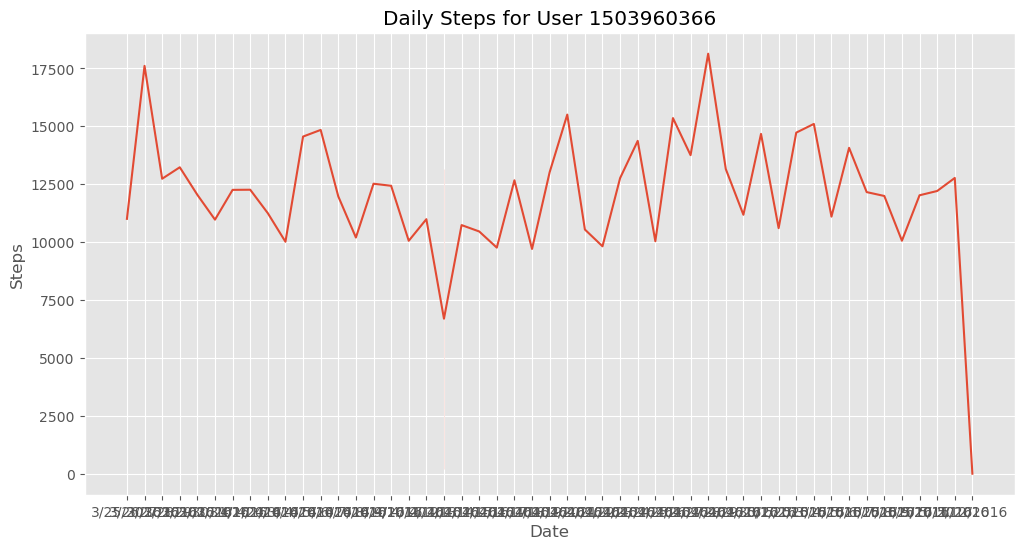

In [71]:
# Choose a sample user
sample_user_id = combined_data['dailyActivity_merged.csv']['Id'].unique()[0]
user_data = combined_data['dailyActivity_merged.csv'][combined_data['dailyActivity_merged.csv']['Id'] == sample_user_id]

# Plot daily steps
plt.figure(figsize=(12, 6))
sns.lineplot(x='ActivityDate', y='TotalSteps', data=user_data)
plt.title(f"Daily Steps for User {sample_user_id}")
plt.xlabel("Date")
plt.ylabel("Steps")
plt.show()


## Average Steps by Day of the Week
A Bar plot showing average steps by day of the week, to analyze usage trends by weekday.

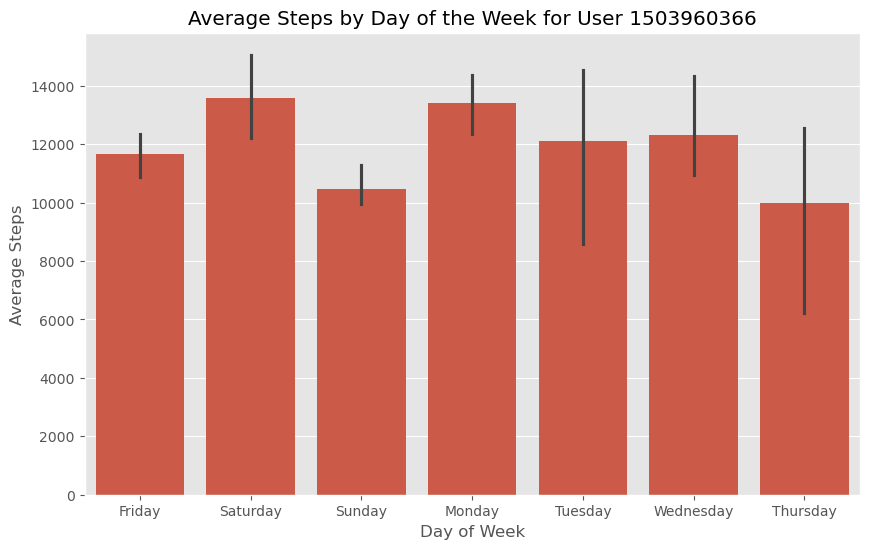

In [87]:
# Convert the 'ActivityDate' column to datetime format
if 'ActivityDate' in user_data.columns:
    user_data['ActivityDate'] = pd.to_datetime(user_data['ActivityDate'], errors='coerce')

# Extract day of the week after ensuring 'ActivityDate' is datetime
user_data['day_of_week'] = user_data['ActivityDate'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='TotalSteps', data=user_data)
plt.title(f"Average Steps by Day of the Week for User {sample_user_id}")
plt.xlabel("Day of Week")
plt.ylabel("Average Steps")
plt.show()

## Summary
This project involved analyzing a dataset of Fitbit users' daily activity, steps, sleep patterns, and other health indicators to discover trends in consumer behavior with wearable fitness devices. After cleaning and combining datasets, the analysis revealed key insights into user activity patterns, including:
- Daily Steps: Trends in average steps per day, including variations by day of the week.
- Activity and Sleep Correlation: Patterns in physical activity levels and sleep duration.
- Hourly Usage Patterns: Insights into peak activity periods, which may indicate when users are most engaged with their health data.
  
These findings helped answer key questions on how wearable devices are utilized and provide a foundation for recommending marketing strategies for Bellabeat's product line.

## Conclusion
Analyzing Fitbit data has offered valuable insights into users' health and fitness routines, which can help Bellabeat tailor its product development and marketing efforts. Key trends, such as weekday versus weekend activity levels and peak active hours, suggest opportunities to promote features like personalized activity tracking, sleep monitoring, and habit coaching in the Bellabeat app.

By focusing on these data-driven insights, Bellabeat can align its messaging with users' fitness goals, enhancing user engagement and increasing the appeal of Bellabeat’s products. Additionally, by emphasizing real-time tracking and accessible health insights, Bellabeat can better position itself in the competitive landscape of wellness technology for women.